# Clasificación de imágenes con redes profundas 

Mauricio Flores Pérez | A01639917
<br>
Tom Bruno Arc | A01562405
<br>
Alejandro Hermosillo García | A01634552

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.datasets import fashion_mnist
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.utils import to_categorical

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

### Fashion-MNIST

**Labels**
<br>
* 0 - T-shirt/Top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker 
* 8 - Bag
* 9 - Ankle boot


In [ ]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
  
train_X.reshape(train_X.shape[0], 28, 28, 1)
test_X.reshape(test_X.shape[0], 28, 28, 1)

train_X = train_X/255.0
test_X = test_X/255.0

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

4422102/4422102 [==============================] - 0s 0us/step


#### Modelo 

In [ ]:
def define_model():
  model = Sequential()
  model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding="same", input_shape=(28, 28, 1)))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))
  model.add(Conv2D(128, (3,3), activation='relu', padding="same"))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))
  model.add(Conv2D(256, (3,3), activation='relu', padding="same"))
  model.add(Conv2D(256, (3,3), activation='relu', padding="same"))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))
  model.add(Conv2D(512, (3,3), activation='relu', padding="same"))
  model.add(Conv2D(512, (3,3), activation='relu', padding="same"))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))
  model.add(Conv2D(512, (3,3), activation='relu', padding="same"))
  model.add(Conv2D(512, (3,3), activation='relu', padding="same"))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))
  model.add(Flatten())
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=10, activation="softmax"))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model = define_model()
hist = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=100, batch_size=32, verbose=2)

Epoch 1/100
1875/1875 - 32s - loss: 0.5886 - accuracy: 0.7776 - val_loss: 0.3482 - val_accuracy: 0.8725 - 32s/epoch - 17ms/step
Epoch 2/100
1875/1875 - 31s - loss: 0.3191 - accuracy: 0.8864 - val_loss: 0.3344 - val_accuracy: 0.8839 - 31s/epoch - 16ms/step
Epoch 3/100
1875/1875 - 32s - loss: 0.2766 - accuracy: 0.9015 - val_loss: 0.2961 - val_accuracy: 0.8995 - 32s/epoch - 17ms/step
Epoch 4/100
1875/1875 - 31s - loss: 0.2406 - accuracy: 0.9146 - val_loss: 0.2623 - val_accuracy: 0.9096 - 31s/epoch - 16ms/step
Epoch 5/100
1875/1875 - 31s - loss: 0.2242 - accuracy: 0.9204 - val_loss: 0.2805 - val_accuracy: 0.9066 - 31s/epoch - 16ms/step
Epoch 6/100
1875/1875 - 31s - loss: 0.2068 - accuracy: 0.9261 - val_loss: 0.2562 - val_accuracy: 0.9135 - 31s/epoch - 16ms/step
Epoch 7/100
1875/1875 - 32s - loss: 0.1994 - accuracy: 0.9299 - val_loss: 0.2647 - val_accuracy: 0.9145 - 32s/epoch - 17ms/step
Epoch 8/100
1875/1875 - 31s - loss: 0.1802 - accuracy: 0.9357 - val_loss: 0.2678 - val_accuracy: 0.9165 

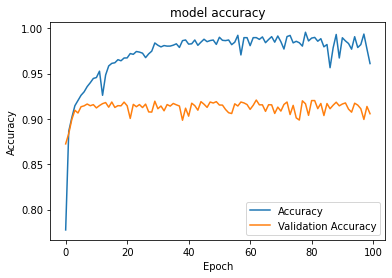

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

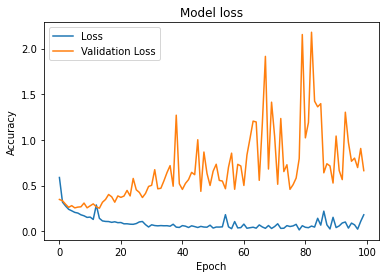

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model loss")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
